# Importing packages and loading data

In [1]:
#LOAD AND IMPORT PACKAGES AND DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cptac
import os

os.chdir('/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio_490_AndreaV/analysis_data')
cptac.download('Ovarian')

cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.7. Please run 'pip install --upgrade cptac' to update it. (/Users/andreavelazquez/anaconda3/lib/python3.11/threading.py, line 975)


True

CPTAC data

In [205]:
#PULL DATA
#clinical data
ov= cptac.Ovarian()
clinical_data= ov.get_clinical()

#protein data
protein_data= ov.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

#transcriptomic data
rna_data= ov.get_transcriptomics()

TCGA DATA

In [195]:
tcga_rna_counts= pd.read_csv("/Users/andreavelazquez/Desktop/School stuff/QBIO490/qbio490_fa23_final_ovarian/OV_rna_count.csv")

In [255]:
tcga_rna_counts.shape
tcga_rna_counts.index

'TCGA-10-0933-01A-01R-1569-13'

In [265]:
#Get rid of genes without any info or low number of counts= not as insightful
tcga_na_mask= tcga_rna_counts.isna().sum() == 0
tcga_masked= tcga_rna_counts.loc[:, tcga_na_mask]

mask1= tcga_rna_counts.sum() == 0
tcga_masked= tcga_masked.loc[:, ~mask1]
#add one so we can normalize, even with 0s in some places
tcga_masked= tcga_masked.add(1)
tcga_masked

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC010980.1,AC007511.1,AC004233.4,AC092910.4,AC073611.1,AC078856.1,AC008763.4,AL592295.6,AL391628.1,AP006621.6
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-10-0933-01A-01R-1569-13,3776,1100,7734,596,587,69,2314,2785,2188,2649,...,144,1,69,1,23,1,1,140,4,14
TCGA-23-1024-01A-02R-1564-13,5485,7,6263,1165,752,244,288,1463,1716,2020,...,63,1,91,3,44,1,1,283,11,128
TCGA-13-0886-01A-01R-1569-13,8085,58,3533,447,235,579,2616,2577,951,1016,...,186,1,17,2,54,1,1,145,16,31
TCGA-29-1769-01A-01R-1567-13,4790,5,3783,625,522,197,2410,2946,1191,927,...,31,1,580,1,21,1,1,205,6,19
TCGA-13-1505-01A-01R-1565-13,5475,50,2636,794,664,225,2537,982,3156,2189,...,57,1,231,2,91,2,1,173,13,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-24-2024-01A-02R-1568-13,9661,8,2984,1748,1005,293,7872,4497,2347,2935,...,162,1,260,3,137,1,1,435,52,146
TCGA-36-1570-01A-01R-1566-13,8744,2,4833,1691,607,166,2461,2408,3310,2157,...,63,1,19,1,99,1,2,642,20,50
TCGA-30-1714-01A-02R-1567-13,2433,3,2038,421,229,51,371,1018,536,923,...,41,1,33,1,20,1,2,75,5,9


# Data preprocessing

In [266]:
#CLEANUP FROM COLUMNS WITH NO VALUES
#Change NaN values to 0 so we can get rid of them
rna_data = rna_data.replace(0, np.nan)

#Cleanup rna df
gene_na_mask = rna_data.isna().sum() == 0
rna_masked = rna_data.loc[:, gene_na_mask]
#logscale
rna_masked= np.log2(rna_masked)

#Cleanup proteins df
protein_na_mask = protein_data.isna().sum() == 0
proteins_masked = protein_data.loc[:, protein_na_mask]
proteins_masked= proteins_masked[:83]

# Consolidating gene list

In [267]:
#GENE LIST FROM EXPLORATORY DATA ANALYSIS WITH TCGA DATA IN R
top53_R= ['TP53', 'TTN', 'CSMD3', 'USH2A', 'NF1', 'RYR2', 
          'MUC16', 'HMCN1', 'FAT3', 'FLG2', 'MACF1', 'SI', 
          'AHNAK', 'MUC17', 'APOB', 'FLG', 'DNAH3', 'LRP1B', 
          'CDK12', 'DST', 'DNAH5', 'LRP1', 'BRCA1', 'SYNE2', 
          'FCGBP', 'SYNE1', 'TG', 'TOP2A', 'DNAH10', 'RB1',
          'RELN', 'COL6A3', 'DNAH8', 'MDN1', 'ADGRV1', 'HUWE1', 
          'MYH4', 'KMT2C', 'TENM1', 'TACC2', 'DYNC1H1', 'PKHD1', 
          'NEB', 'RYR1', 'LRP2', 'CSMD1', 'DMD', 'IGSF10', 
          'LRRK2', 'ZFHX4', 'MYH1', 'KMT2A', 'VPS13B' ]

In [295]:
#GENE LIST FROM LITERATURE REVIEW
lit_genes= ['CLDN3', 'CLDN4', 'HE4', 'CRIP1', 'APOE', 
            'APOJ', 'HLA-DRA', 'HLA-DRB', 'MUC1', 'BCAM', 
            'BUB1B', 'BUB1', 'TTK', 'CCNB1', 'BRCA1', 
            'BRCA2', 'CSMD3', 'MUCI16', 'APOB', 'DST', 
            'FAT3', 'HMCN1', 'RYR1','TP53','TTN', 
            'USH2A', 'AKT1', 'ARID1A', 'FBXW7', 'FGFR2', 
            'JAK1', 'KRAS', 'MLH1', 'MSH2', 'MSH6', 
            'NRAS', 'PIK3CA', 'PIK3R1', 'PIK3R2', 'PMS2', 
            'POLE', 'PPP2R1A', 'PTEN', 'RNF43', 'RPL22', 
            'SMARCA4', 'STK11', 'SPOP', 'FOXL2', 'CTNNB1', 
            'BRAF']

In [297]:
set1= set(top53_R)
set2= set(lit_genes)
intersected_set = set1.intersection(set2)
intersected_list = list(intersected_set)

print(intersected_list)

['TP53', 'TTN', 'DST', 'APOB', 'FAT3', 'USH2A', 'HMCN1', 'BRCA1', 'CSMD3', 'RYR1']


In [269]:
#See what we have data on for the literature genes
lit_rna= inDF(lit_genes, rna_masked)
lit_in_rna= lit_rna[0].copy()
lit_not_rna= lit_rna[1].copy()

R_rna= inDF(top53_R, rna_masked)
R_in_rna= R_rna[0].copy()
R_not_rna= R_rna[1].copy()

In [270]:
#See what we have data on for the proteins
lit_proteins= inDF(lit_genes, proteins_masked)
lit_in_proteins= lit_proteins[0].copy()
lit_not_proteins= lit_proteins[1].copy()

R_proteins= inDF(top53_R, proteins_masked)
R_in_proteins= R_proteins[0].copy()
R_not_proteins= R_proteins[1].copy()

In [271]:
lit_tcga= inDF(lit_genes, tcga_masked)
lit_in_tcga= lit_tcga[0].copy()
lit_not_tcga= lit_tcga[1].copy()

R_tcga= inDF(top53_R, tcga_masked)
R_in_tcga= R_tcga[0].copy()
R_not_tcga= R_tcga[1].copy()

In [298]:
#Do the same for a join, final list
final_list= join_lists(top53_R, lit_genes)
final_proteins= inDF(final_list, proteins_masked)
final_in_proteins= final_proteins[0].copy()
final_not_proteins= in_proteins_df[1].copy()

#inDF function for transcriptomic data
final_rna= inDF(final_list, rna_masked)
final_in_rna= final_rna[0].copy()
final_not_rna= in_rna_df[1].copy()

final_tcga= inDF(final_list, tcga_masked)
final_in_tcga= final_tcga[0].copy()
final_not_tcga= final_tcga[1].copy()


In [300]:
intersected_tcga= inDF(intersected_list, tcga_masked)
intersected_in_tcga= intersected_tcga[0]
intersected_not_tcga= intersected_tcga[1]

In [273]:
#ENSURE WE HAVE DATA FOR SPECIFIC GENES IN A GIVEN DF 
# =====inDF function=====
#output produces 2 lists:
#     -1st element[0]=is in df, 
#     -2nd element[1]=not in df
#========================
def inDF(genes, df):
    results=[]
    final=[]
    no_info=[]
    
    for i in range(len(genes)):
        #see if gene exists in df columns 
        exists= genes[i] in df.columns
        
        #gene doesn't exist, need to add it to our noinfo list
        if exists == 0:
            no_info.append(genes[i])
        #or it exists so it makes it to our final list of relevant genes
        else:
            final.append(genes[i])
    
    #finally, we add both lists to our output list
    results.append(final)
    results.append(no_info)
    
    return results

In [274]:
#JOIN TWO LISTS, WITHOUT DUPLICATES
# =====join_lists function=====
#newlist= unique in both
#==============================
#list2= smaller list! for better runtime 
#(i.e. list1 being of higher magnitude than list2 in the # of genes)
#like looking for 3 specific genes in 1000 genes, and so on
def join_lists(list1, list2):
    #make copy of first list to use as starting point
    joint= list1.copy()
    
    #go through each gene from list2
    for i in range(len(list2)):
        #see if it exists in our joint list
        exist= joint.count(list2[i])
        
        #if it exists, ignore it and go onto next iteration
        if exist!=0:
            continue
            
        #if not, print a statement and add it to the joint list
        joint.append(list2[i])
    
    #return list without duplicates 
    return joint

# Making new df w/ genes we will use in our model

In [275]:
#LOAD PACKAGES
from sklearn.preprocessing import StandardScaler

In [276]:
#MAKE NEW DF WE WILL FEED THE MODEL
#3 different lists of genes for rna and proteins
#lit_in_rna/proteins= lit genes in rna
#R_in_rna/proteins= R genes in rna
#final_in_rna/proteins= joint list in rna

#make new df w proteins
selected_lit_proteins= proteins_masked.loc[: , lit_in_proteins]
selected_R_proteins= proteins_masked.loc[:, R_in_proteins]
selected_final_proteins= proteins_masked.loc[: , final_in_proteins]

#same for rna dfs
selected_lit_rna= rna_masked.loc[: , lit_in_rna]
selected_R_rna= rna_masked.loc[: , R_in_rna]
selected_final_rna= rna_masked.loc[:, final_in_rna]

# #Make a multi-omic df joining the data from the proteins and the rna
# #just doing this for the final list
# #join into one df- append transcriptomic data
# selected_final_multi= selected_lit_proteins.copy()
# for i in range(len(in_rna_df[0])):
#     colname= in_rna_df[0][i]
#     colname= colname + "rna"
#     print(colname)
#     selected_multi[colname]= rna_masked.loc[: , lit_in_rna[i]]
#     i+=1
#     continue

# selected_rna= rna_masked.loc[: , in_rna_df[0]]
#if anything, just change the df feeding to the model
#need to find NAs in joint df!! how!

In [497]:
#make new df w tcga data
selected_lit_tcga= tcga_masked.loc[:, lit_in_tcga]
selected_R_tcga= tcga_masked.loc[:, R_in_tcga]
selected_final_tcga= tcga_masked.loc[:, final_in_tcga]
selected_intersected_tcga= tcga_masked.loc[:, intersected_in_tcga]

#normalize data
selected_lit_tcga= np.log10(selected_lit_tcga)
selected_R_tcga= np.log10(selected_R_tcga)
selected_final_tcga= np.log10(selected_final_tcga)
selected_intersected_tcga= np.log10(selected_intersected_tcga)

selected_lit_tcga


,CLDN3,CLDN4,CRIP1,APOE,HLA-DRA,MUC1,BCAM,BUB1B,BUB1,TTK,...,PPP2R1A,PTEN,RNF43,RPL22,SMARCA4,STK11,SPOP,FOXL2,CTNNB1,BRAF
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-10-0933-01A-01R-1569-13,3.555820,3.977037,1.698970,4.586947,3.586250,3.338058,5.409942,3.272770,3.574841,3.480869,...,4.162923,3.759592,2.692847,3.745933,3.952017,3.353532,3.419460,3.193403,4.106225,3.263873
TCGA-23-1024-01A-02R-1564-13,5.042784,4.836400,2.342423,4.119190,4.234593,4.465427,5.888176,3.220892,3.483730,3.126781,...,4.344137,3.653888,3.004321,4.377015,4.597695,3.708166,3.546296,2.243038,4.320997,3.452706
TCGA-13-0886-01A-01R-1569-13,4.652033,4.376212,1.880814,4.695350,4.796755,4.343428,4.719986,3.049993,3.060698,3.023664,...,3.895699,3.867821,3.022841,3.779452,4.210452,3.439491,3.451172,1.301030,4.000694,3.194237
TCGA-29-1769-01A-01R-1567-13,4.671913,4.525149,2.301030,4.145569,4.387497,4.589860,4.894227,3.067815,3.528274,3.362482,...,4.254596,3.531607,2.294466,4.014058,3.474071,3.329398,3.386142,0.954243,4.043794,3.308778
TCGA-13-1505-01A-01R-1565-13,4.129110,4.008898,2.167317,3.776338,4.620230,4.012415,4.887589,2.960471,3.260787,3.000434,...,4.163221,3.799065,2.833784,3.829432,4.211067,3.368101,3.513351,1.653213,4.602722,3.288026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-24-2024-01A-02R-1568-13,4.790602,4.675943,2.870989,4.205177,5.020096,4.703352,5.544396,3.115611,3.231215,3.136721,...,4.209917,3.782186,2.965672,3.901676,4.213066,3.553398,3.706206,0.000000,4.712801,3.350829
TCGA-36-1570-01A-01R-1566-13,4.955154,4.483630,2.361728,4.038898,4.949239,4.610532,4.953876,3.456366,3.646894,3.647383,...,4.143109,3.056524,3.193403,4.284521,4.686270,3.406199,3.826981,2.740363,4.435032,3.327972
TCGA-30-1714-01A-02R-1567-13,4.074195,4.198712,2.342423,3.538071,4.262878,4.457534,4.404235,2.675778,3.201943,3.028571,...,3.501607,3.155032,2.595496,3.885474,3.513218,2.907949,3.358316,2.079181,3.994317,2.808886


Scale CPTAC data

In [279]:
#SCALE DATA
scaler = StandardScaler()

#RNA dfs
lit_rna_scaled = scaler.fit_transform(selected_lit_rna)
R_rna_scaled= scaler.fit_transform(selected_R_rna)
final_rna_scaled= scaler.fit_transform(selected_final_rna)

#Protein dfs
lit_proteins_scaled= scaler.fit_transform(selected_lit_proteins)
R_proteins_scaled= scaler.fit_transform(selected_R_proteins)
final_proteins_scaled= scaler.fit_transform(selected_final_proteins)


Scaling tcga data

In [303]:
lit_tcga_scaled= scaler.fit_transform(selected_lit_tcga)
R_tcga_scaled= scaler.fit_transform(selected_R_tcga)
final_tcga_scaled= scaler.fit_transform(selected_final_tcga)
intersected_tcga_scaled= scaler.fit_transform(selected_intersected_tcga)

# Dimension reduction

In [152]:
#DIMENSION REDUCTION
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from hdbscan import HDBSCAN
from matplotlib import colormaps

In [153]:
#Dimension reduction analysis
#Evaluate performance of different dimension reduction approaches for our model.
#Based on this, we can see that UMAP is probably the best dimension reducer to use for our model 
#UMAP reduces the data and clusters are more visible than in others. It also shows linear trend that could be helpful in clustering 
def dim_red(df, n_n_umap=15):
    plt.rcParams['figure.figsize'] = [12, 5]

    reducers = [PCA(), TSNE(), UMAP(n_neighbors=n_n_umap, min_dist=0.0)]
    reducers_names = ['PCA', 't-SNE', 'UMAP']

    fig, axs = plt.subplots(1, 3, constrained_layout=True)

    for i in range(3):
        embedding = reducers[i].fit_transform(df)
        x_vals = embedding[:, 0]
        y_vals = embedding[:, 1]
        axs[i].scatter(x_vals, y_vals, alpha=0.5)
        axs[i].set_title(reducers_names[i])
    


Dimension reduction for CPTAC

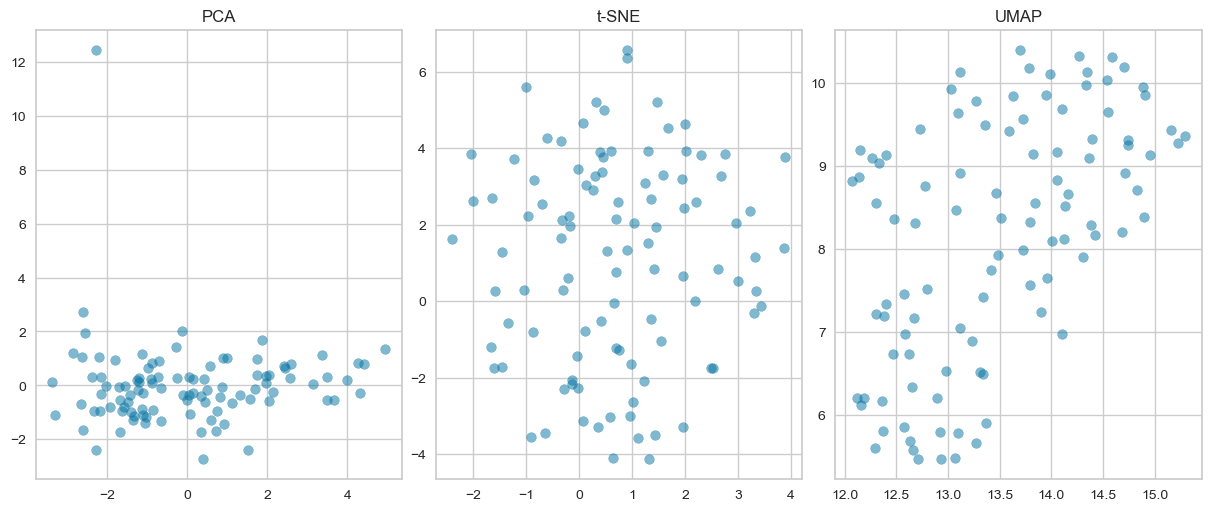

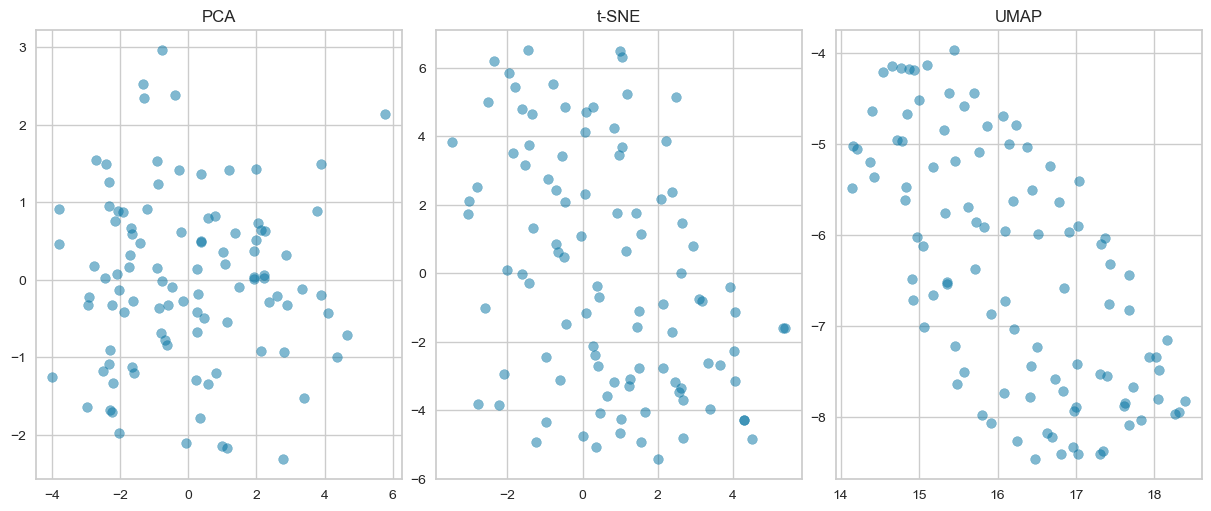

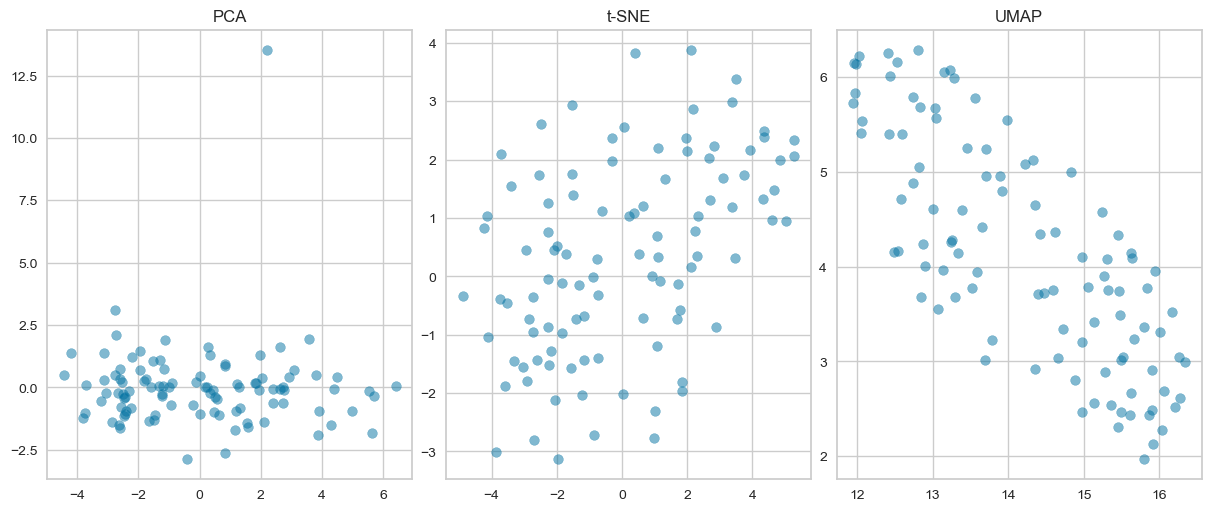

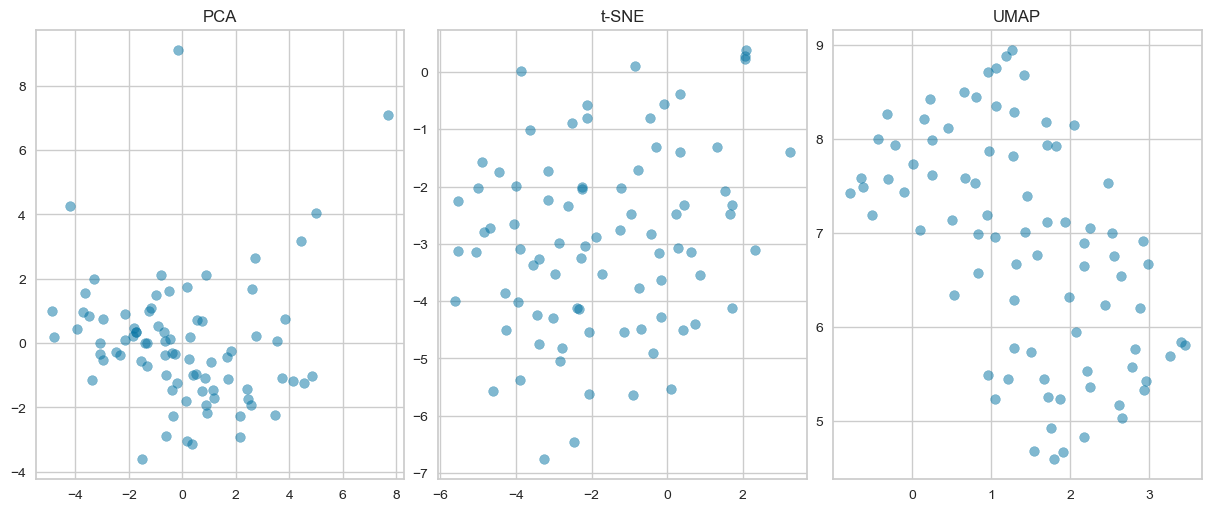

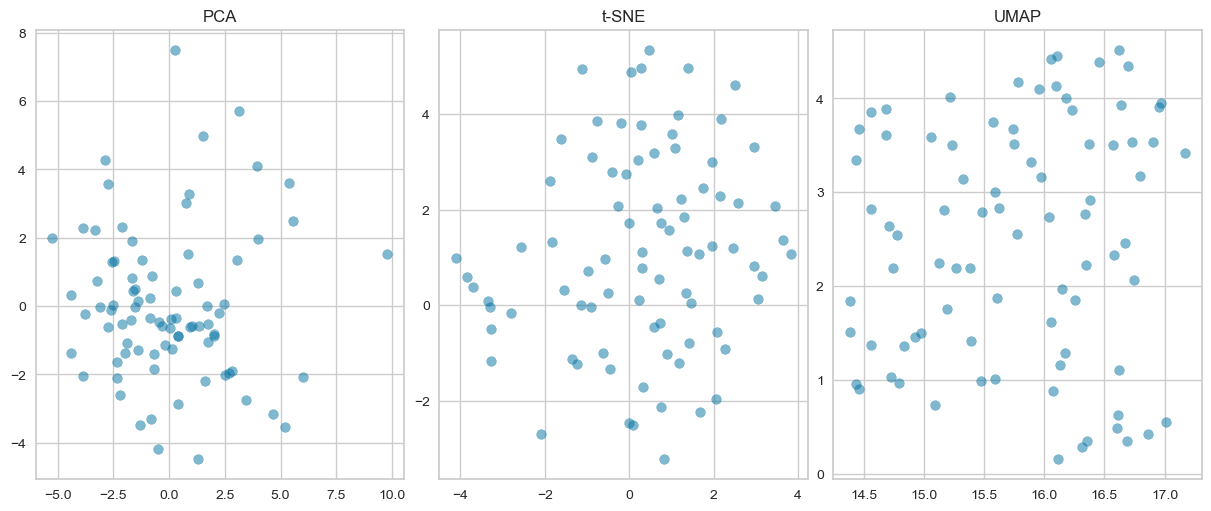

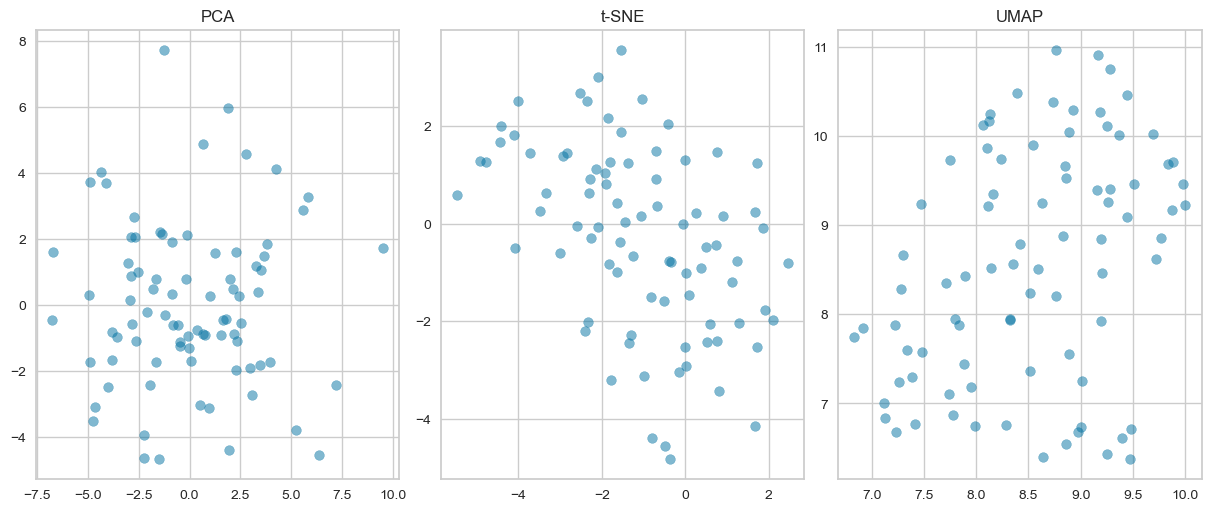

In [281]:
#rna scaled, proteins scaled, drop_px
dim_red(lit_rna_scaled, 15)
dim_red(R_rna_scaled, 15)
dim_red(final_rna_scaled, 15)

#proteins df has more columns, so looking at more neighbors is better
dim_red(lit_proteins_scaled, 15)
dim_red(R_proteins_scaled, 15)
dim_red(final_proteins_scaled, 15)

Dimension reduction for TCGA

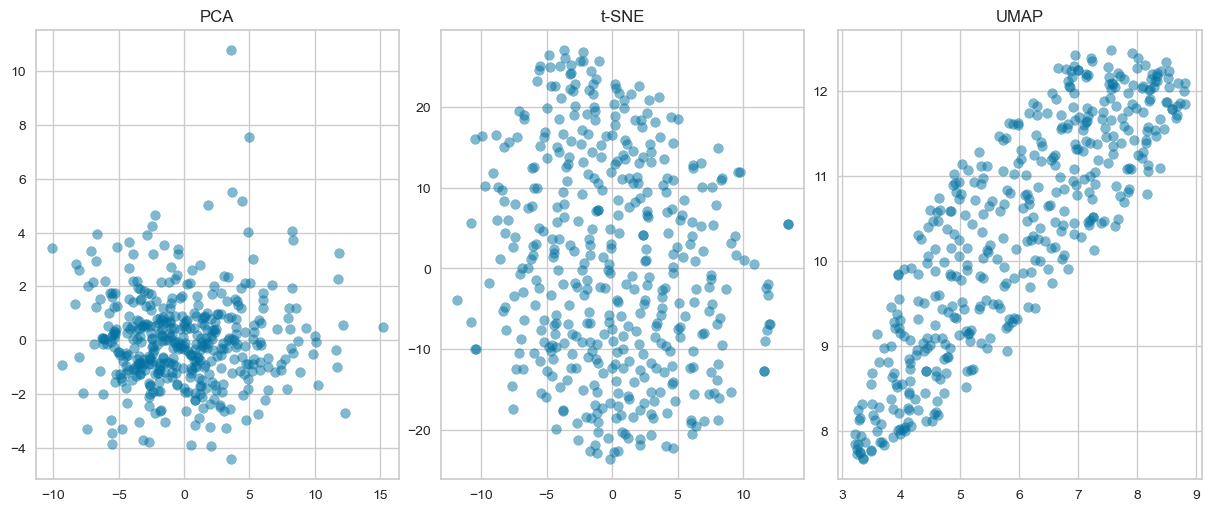

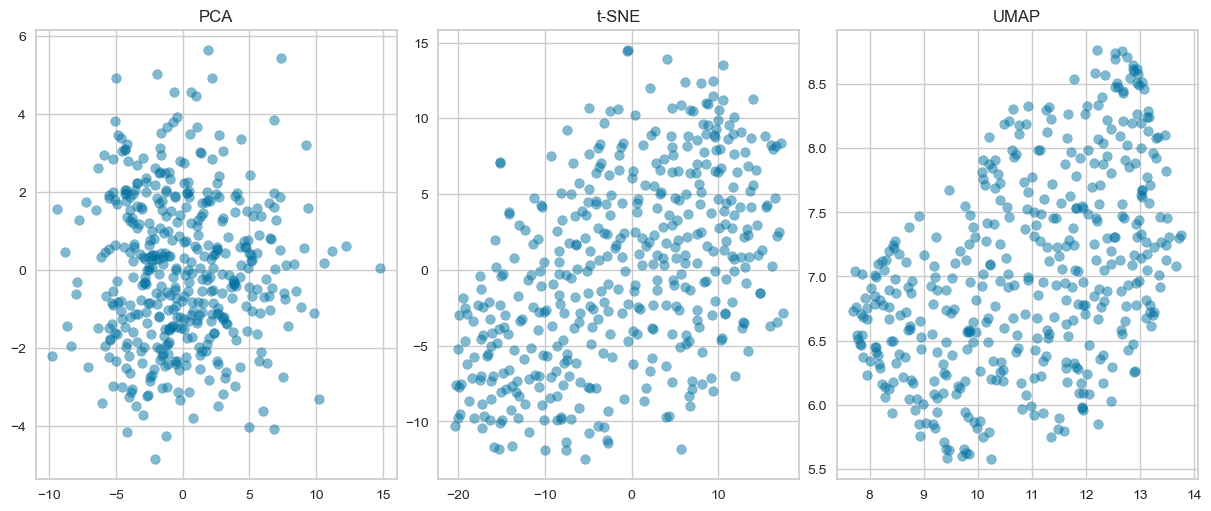

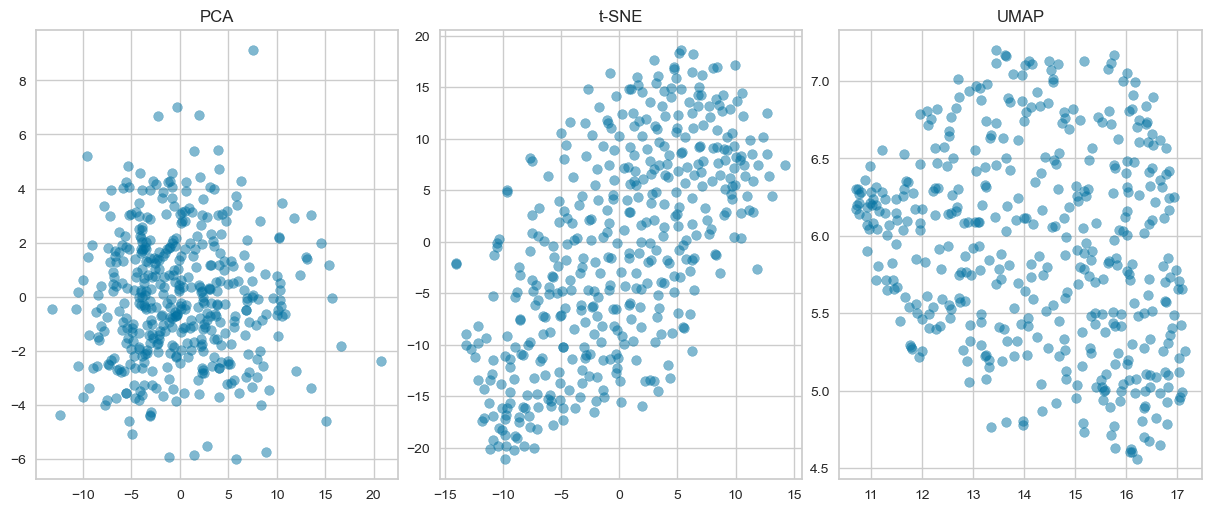

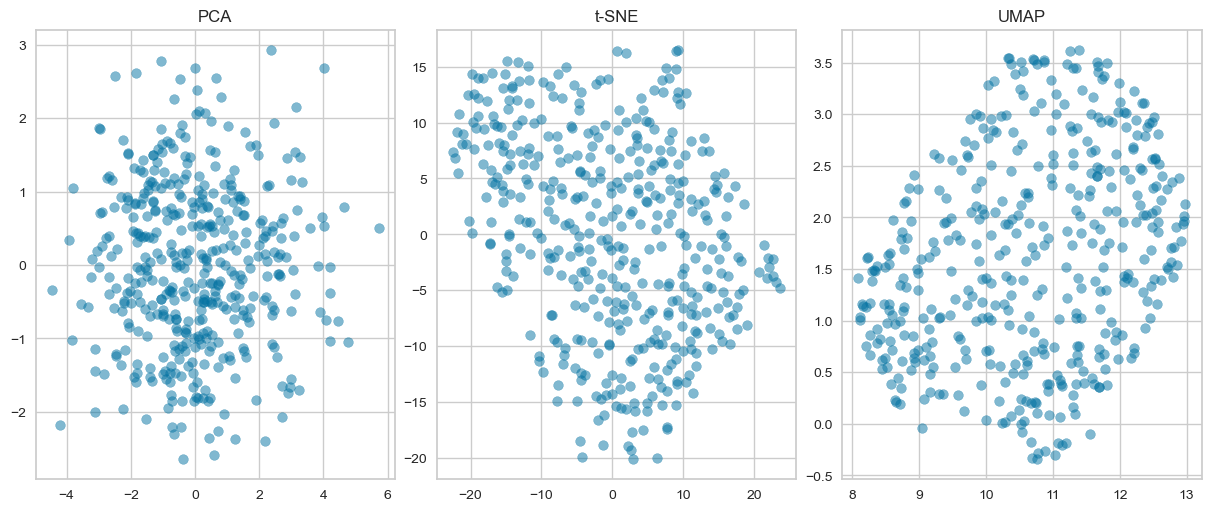

In [529]:
dim_red(lit_tcga_scaled, 100)
dim_red(R_tcga_scaled, 100)
dim_red(final_tcga_scaled, 100)
dim_red(intersected_tcga_scaled, 100)

# KMeans clustering model

Elbow plot for num clusters

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

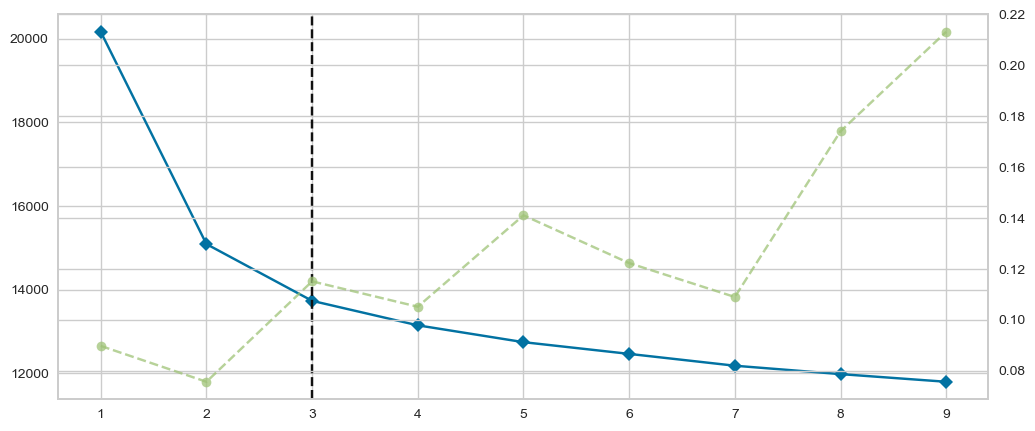

In [615]:
# elbow  plot method 2
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(lit_tcga_scaled)

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

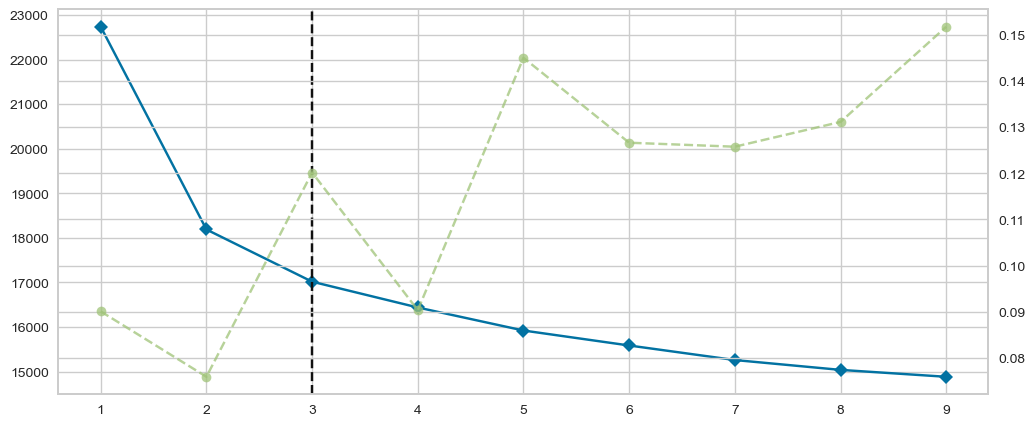

In [634]:
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(R_tcga_scaled)

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

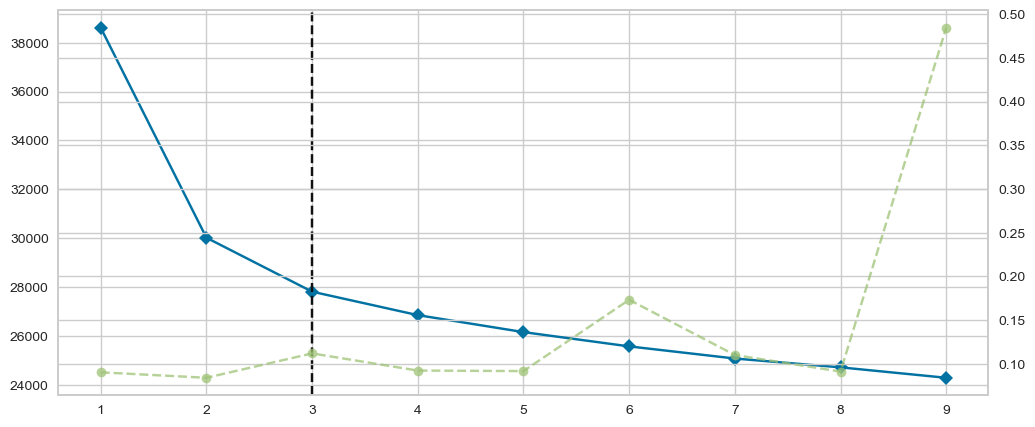

In [636]:
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(final_tcga_scaled)

In [627]:
def KM_cluster(df, num=3):
    #Define reducer we will use. notes:
    #selected_lit_tcga shape is 429 samples x 47 genes
    #using n_neighbors=100 because it's ~1/4 of the num samples
    #   favors global vs local relationships in the data
    #20 components- reducing from 47
    reducer= UMAP(n_neighbors=100, 
                  min_dist=0.00,
                  n_components=10)
    
    embedding = reducer.fit_transform(df)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]

    KMeans_clusterer = KMeans(n_clusters=num)

    labels = KMeans_clusterer.fit_predict(embedding)
    
    plt.scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
    
    return labels

KMEANS clustering for TCGA

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


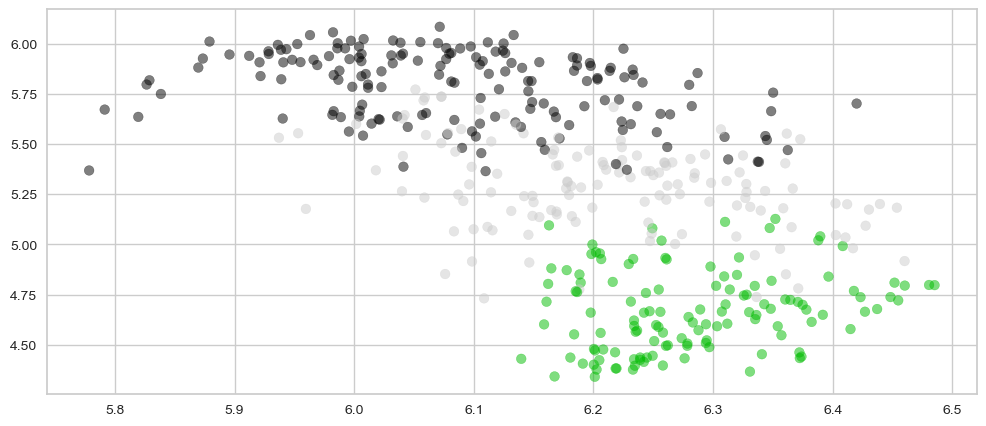

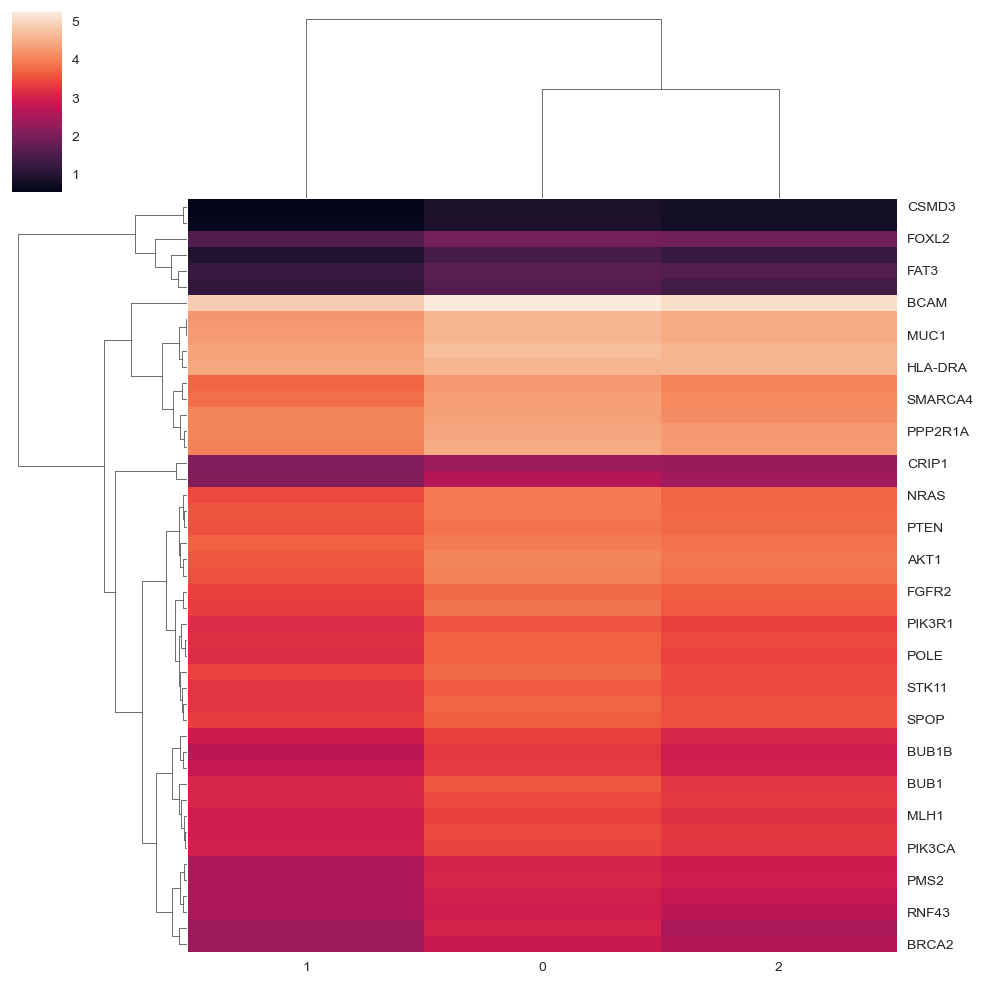

In [631]:
#function does KM cluster and returns the label predictions 
labels_lit_tcga= KM_cluster(lit_tcga_scaled)
labels= labels_lit_tcga
### features is whichever df you were using for the dimensionality reduction
genes_by_cluster = pd.DataFrame(index=np.unique(labels), 
                                columns=selected_lit_tcga.columns)

for lab in labels:
 lab_mask = labels==lab
 tot_amts = selected_lit_tcga.loc[lab_mask, :].mean()
 genes_by_cluster.loc[lab, :] = tot_amts

genes_by_cluster = genes_by_cluster.astype(float).T
sns.clustermap(genes_by_cluster)

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1,
       2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1,
       2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0,
       1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2,
       0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0,
       0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0,
       1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0,

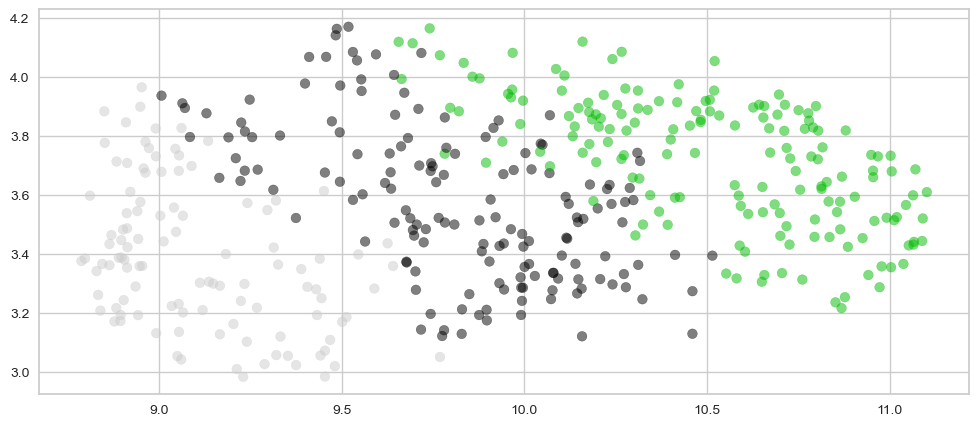

In [632]:
KM_cluster(R_tcga_scaled)

/Users/andreavelazquez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


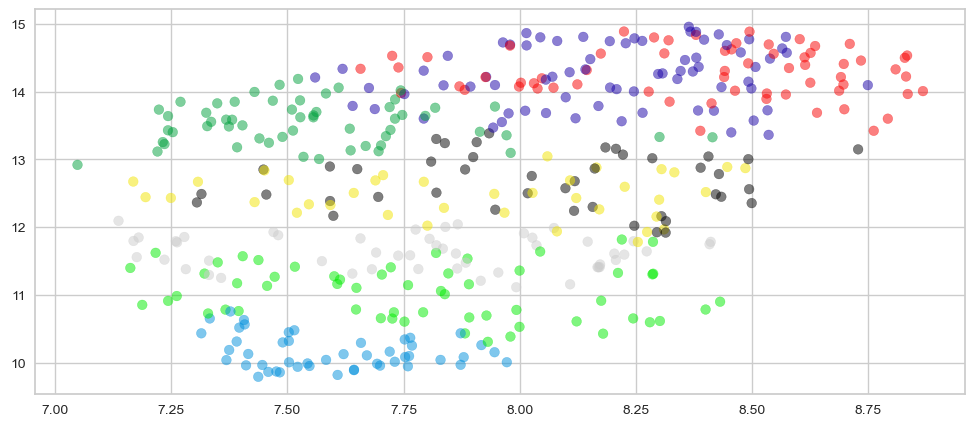

In [494]:
KM_cluster(final_tcga_scaled)

# HDBSCAN clustering model

In [423]:
import umap.plot


In [607]:
#CLUSTERING MODEL USING HDBSCAN 
def HDBSCAN_cluster(df, n_n_UMAP=15):
    plt.rcParams['figure.figsize'] = [12, 5]
    HDBSCAN_clusterer = HDBSCAN(gen_min_span_tree=True)

    reducers = [
        PCA(),
        TSNE(),
        UMAP(n_neighbors=n_n_UMAP, 
            min_dist=0,
            n_components= 5)
    ]
    reducers_names = ['PCA', 't-SNE', 'UMAP']

    fig, axs = plt.subplots(1, 3, constrained_layout=True)
    
    for i in range(3):
        embedding = reducers[i].fit_transform(df)
        x_vals = embedding[:, 0]
        y_vals = embedding[:, 1]
        labels = HDBSCAN_clusterer.fit_predict(embedding)
        axs[i].scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
        axs[i].set_title(reducers_names[i])
        plt.show()        


In [600]:
mapper=embedding 
umap.plot.points(mapper)


NameError: name 'embedding' is not defined

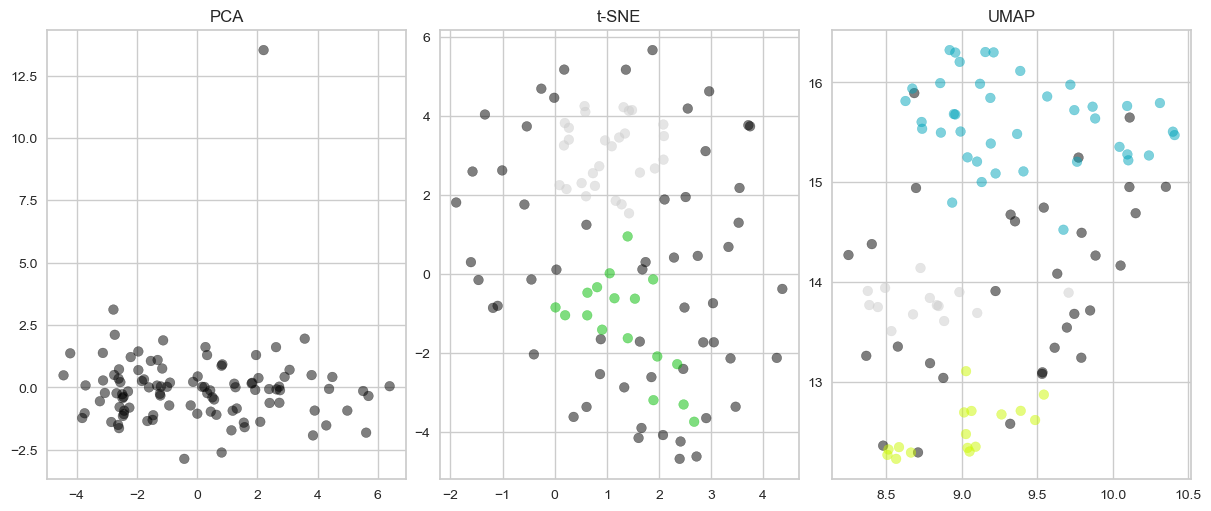

In [369]:
HDBSCAN_cluster(final_rna_scaled, 15)

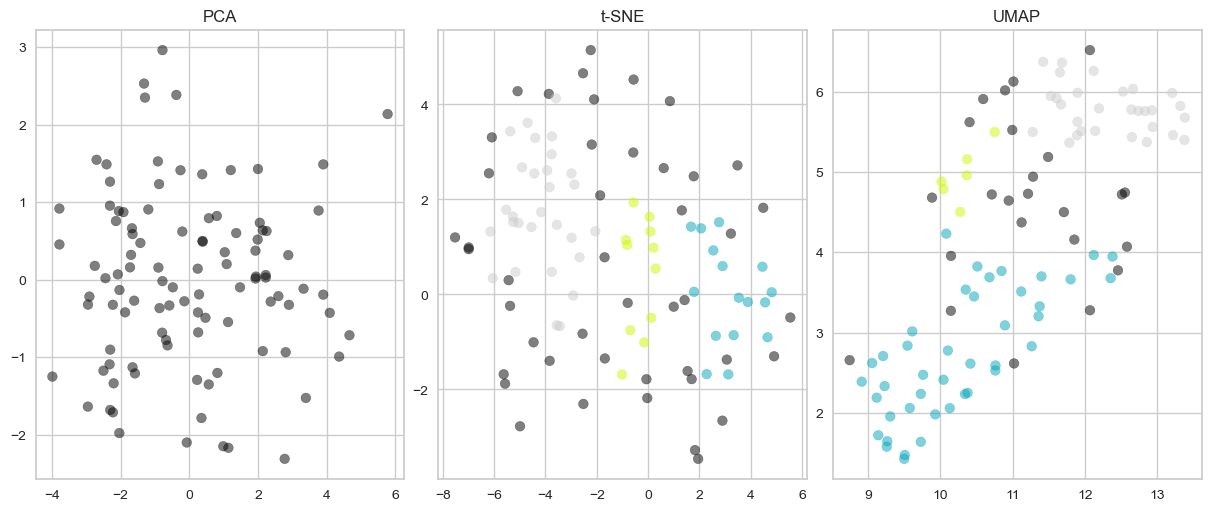

In [173]:
HDBSCAN_cluster(R_rna_scaled, 15)

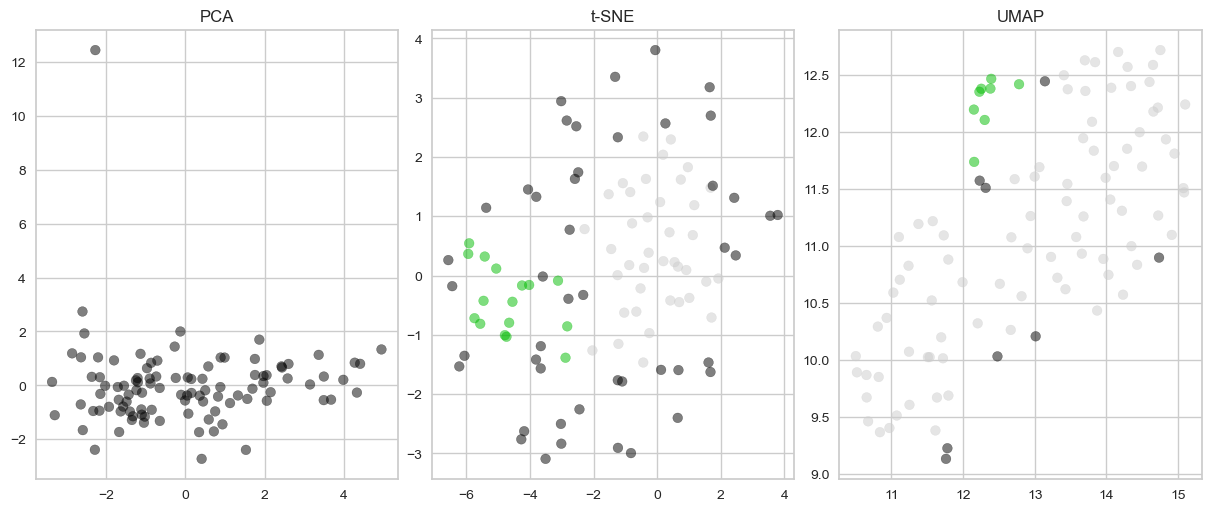

In [178]:
HDBSCAN_cluster(lit_rna_scaled, 15)

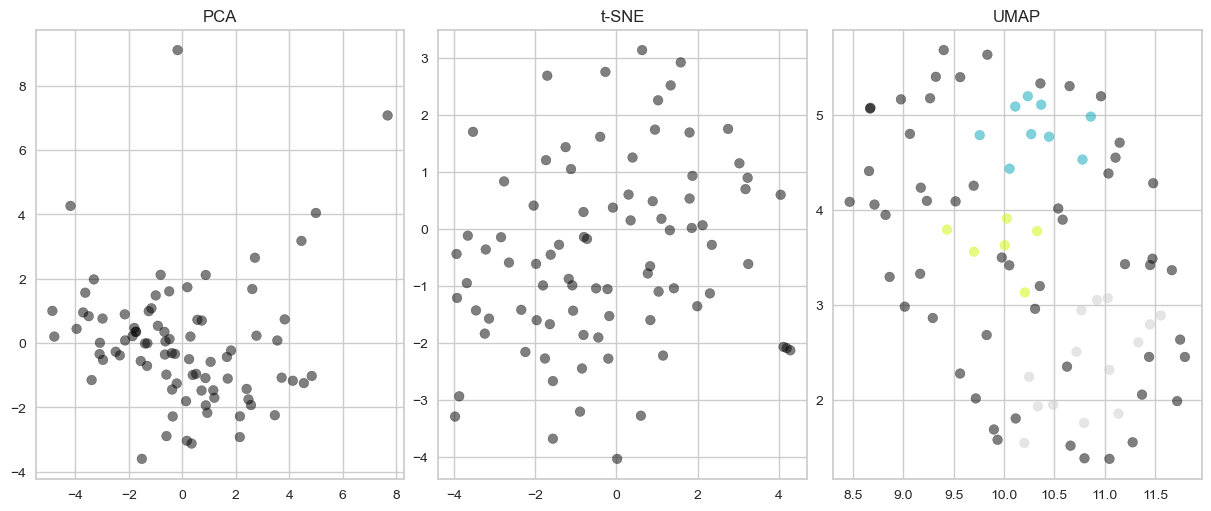

In [346]:
HDBSCAN_cluster(lit_proteins_scaled, 15)

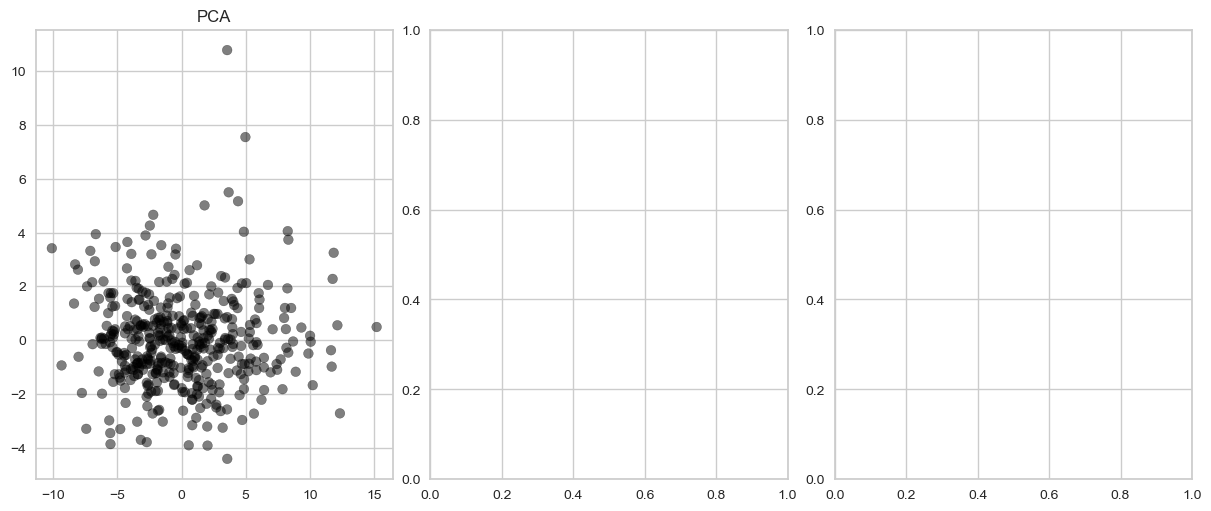

In [611]:
HDBSCAN_cluster(lit_tcga_scaled, 100)

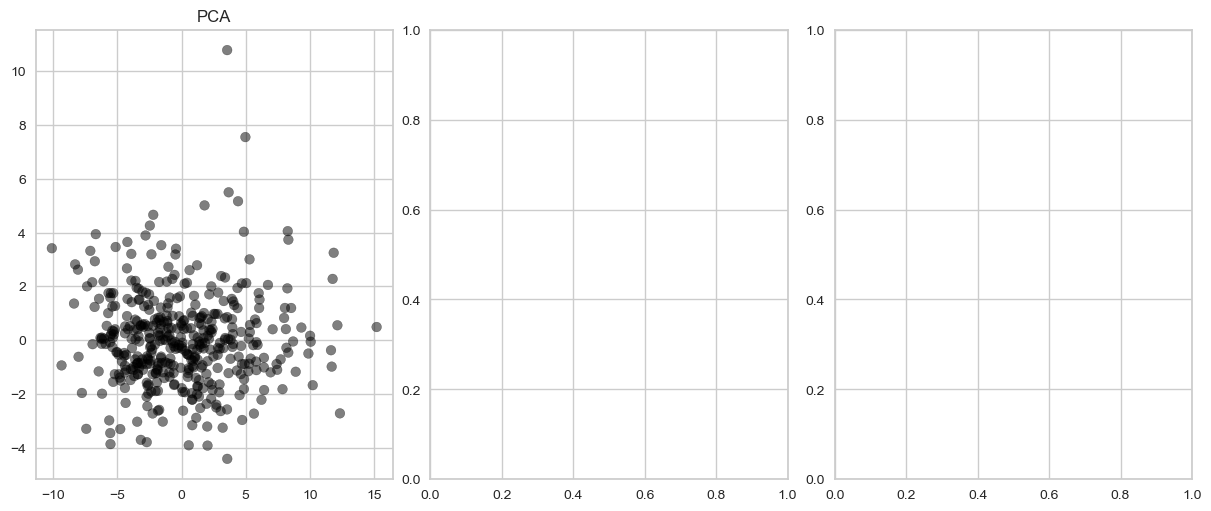

In [605]:
HDBSCAN_cluster(lit_tcga_scaled, 30)

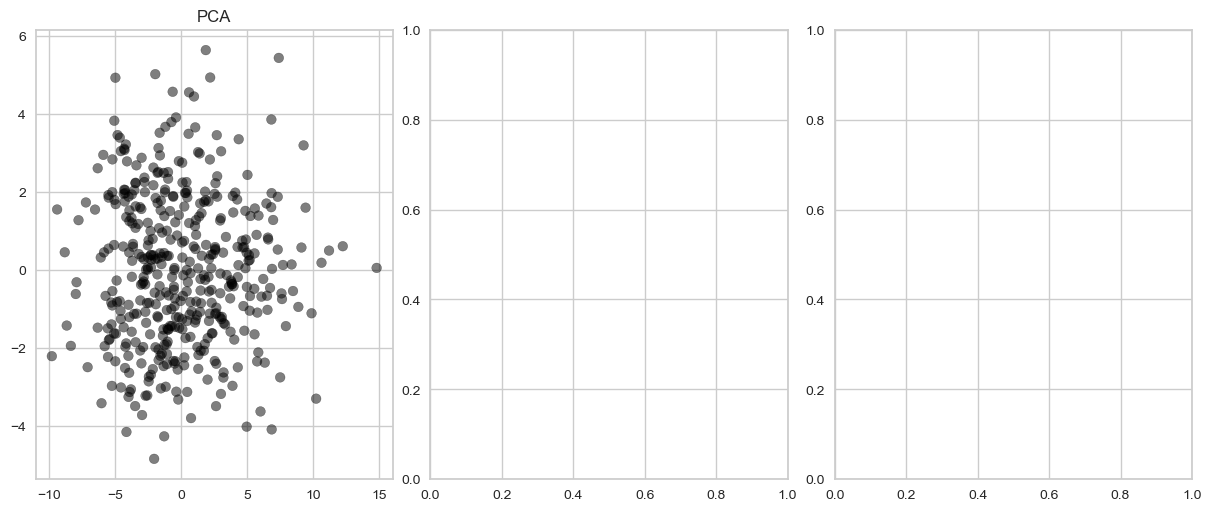

In [606]:
HDBSCAN_cluster(R_tcga_scaled, 30)

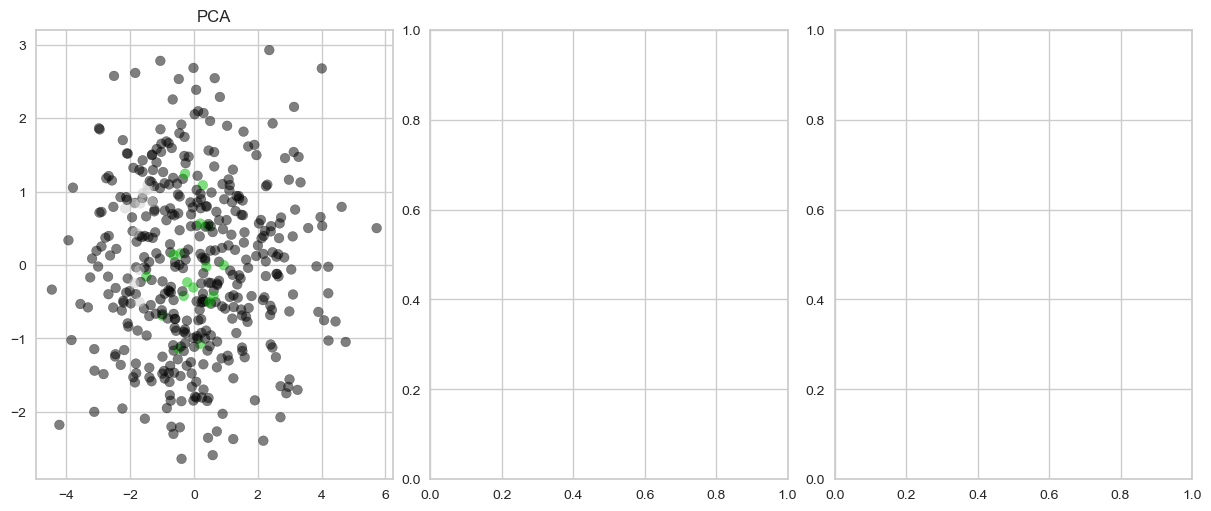

In [598]:
HDBSCAN_cluster(intersected_tcga_scaled, 110)

In [414]:
#ASSESSING MODELS
HDBSCAN_clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('nipy_spectral', 8))

NameError: name 'HDBSCAN_clusterer' is not defined

What we need help with :
- patient barcodes for each cluster
- what makes each cluster different (i.e. higher expression of TTN, lower in TP53...)
- if there's like any statistical way to determine the most correct number for the UMAP n_neighbor?? we used 3 and 5 but those were arbitrary choices based on what worked better to make clusters. Website recommended using 30 but it was... terrible
- if some parameters have more weight than others in the clustering
- optional: how to graph different symbols for different patients, maybe not on same cluster. Like, a + for px that did chemo, * for pt that did targeted cell therapy
- How to get rid of the PCA and t-sne graphs for the HDBSCAN model? I tried deleting it but it breaks it soemhow
- do we need to call the model like something different each time? or will it get confused when doing like the tree plots^^
    